In [1]:
#Stuff we could need for the analysis
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#importing the data
data = pd.read_excel (r'Chicago Housing Forcast.xlsx')

print (data.dtypes)

Date     datetime64[ns]
Price             int64
dtype: object


In [3]:
#sorting the data
data = data.sort_values('Date')

In [4]:
#Making sure there is no null values
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [5]:
#Grouping the data by Date and the by Price
data = data.groupby('Date')['Price'].sum().reset_index()

In [6]:
data.head()

,Date,Price
0,2012-01-01,140000
1,2012-02-01,135000
2,2012-03-01,150000
3,2012-04-01,157000
4,2012-05-01,170000


In [7]:
#Indexing
data = data.set_index('Date')
data.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [8]:
#Making sure everything is monthly
y = data['Price'].resample('MS').mean()

In [9]:
#making sure the above worked
y['2012':]

Date
2012-01-01    140000
2012-02-01    135000
2012-03-01    150000
2012-04-01    157000
2012-05-01    170000
2012-06-01    181000
2012-07-01    172000
2012-08-01    170000
2012-09-01    160000
2012-10-01    154000
2012-11-01    155000
2012-12-01    151000
2013-01-01    140000
2013-02-01    139000
2013-03-01    155000
2013-04-01    172000
2013-05-01    184000
2013-06-01    205000
2013-07-01    202000
2013-08-01    198000
2013-09-01    185000
2013-10-01    175000
2013-11-01    170000
2013-12-01    175000
2014-01-01    164000
2014-02-01    158000
2014-03-01    175000
2014-04-01    187000
2014-05-01    210000
2014-06-01    220000
               ...  
2017-11-01    225000
2017-12-01    225000
2018-01-01    225000
2018-02-01    230000
2018-03-01    245000
2018-04-01    252000
2018-05-01    255000
2018-06-01    265000
2018-07-01    255000
2018-08-01    245000
2018-09-01    240000
2018-10-01    232000
2018-11-01    235000
2018-12-01    229000
2019-01-01    225000
2019-02-01    234000
2019-03-

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


TypeError: float() argument must be a string or a number, not 'Period'

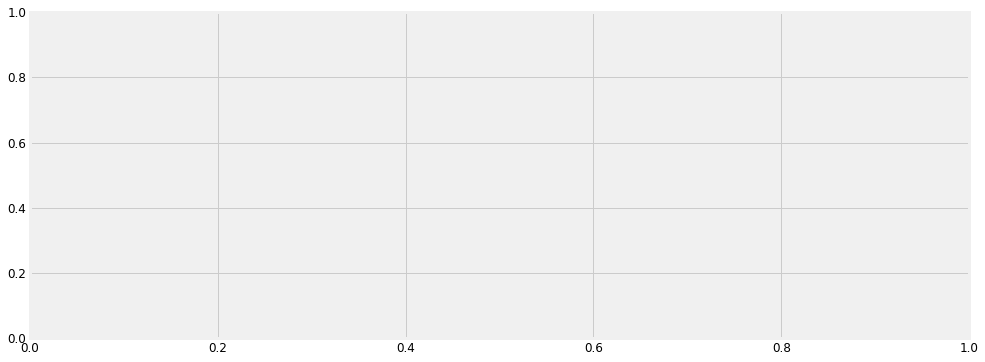

In [10]:
#Looking at our data 
#Winter tends to have drops
from fbprophet import Prophet
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
y.plot(figsize=(15, 6))
plt.show()

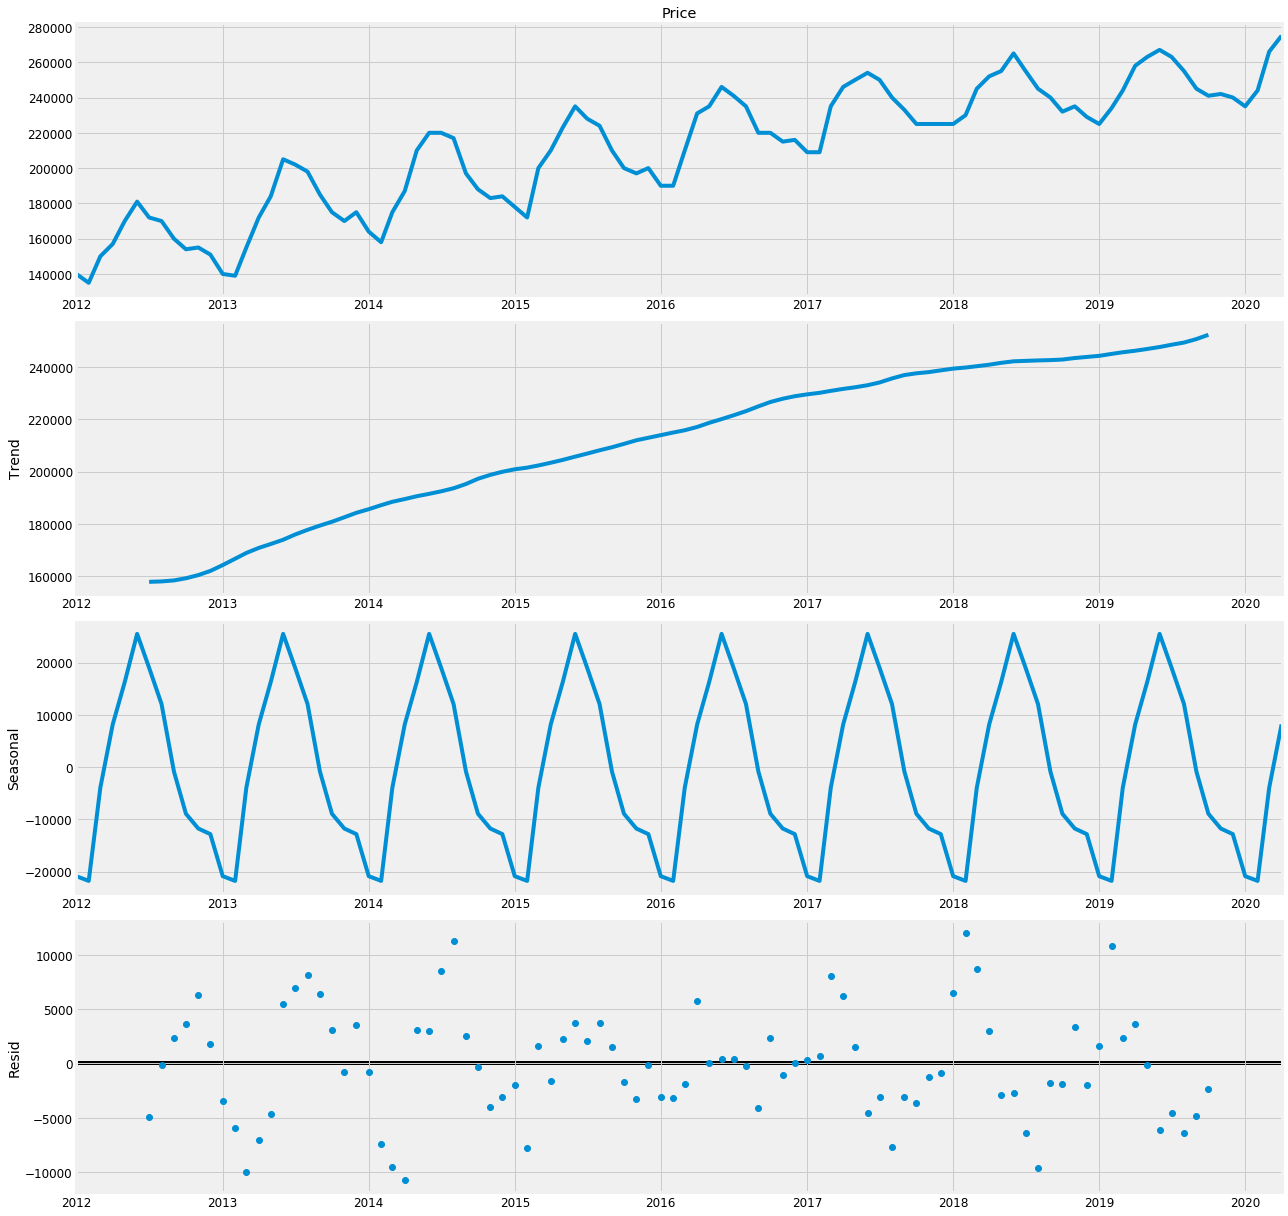

In [11]:
#Plotting the data using different methods in order to notice trends. 
#shows a clear upward trend, seasonality and larger risiduals and time passes
from pylab import rcParams
rcParams['figure.figsize'] = 18, 17

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

##### building ARIMA model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [83]:
#finding optimization for our machine learning code, looking for lowest AIC. 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2713.927721317253
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:305083.4342779591
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1919.7892093222133
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1631.479635217709
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1835.4454175620276
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1797.6507718605676
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1583.580625756693
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1526.9348675180295
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2618.6406093184505
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:308460.65123378445
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1856.2190867289416
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1588.4542631971196
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2488.684743312581
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2406.624217315393
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1625.0910798223038
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1573.9971189540574
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2090.4779508171823
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1789.915668761613

In [84]:
#ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1449.1766292047475 <- this is our optimal number
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4422      0.118     -3.756      0.000      -0.673      -0.211
ma.S.L12      -0.2377      0.107     -2.227      0.026      -0.447      -0.029
sigma2      2.633e+07   3.33e-10   7.91e+16      0.000    2.63e+07    2.63e+07


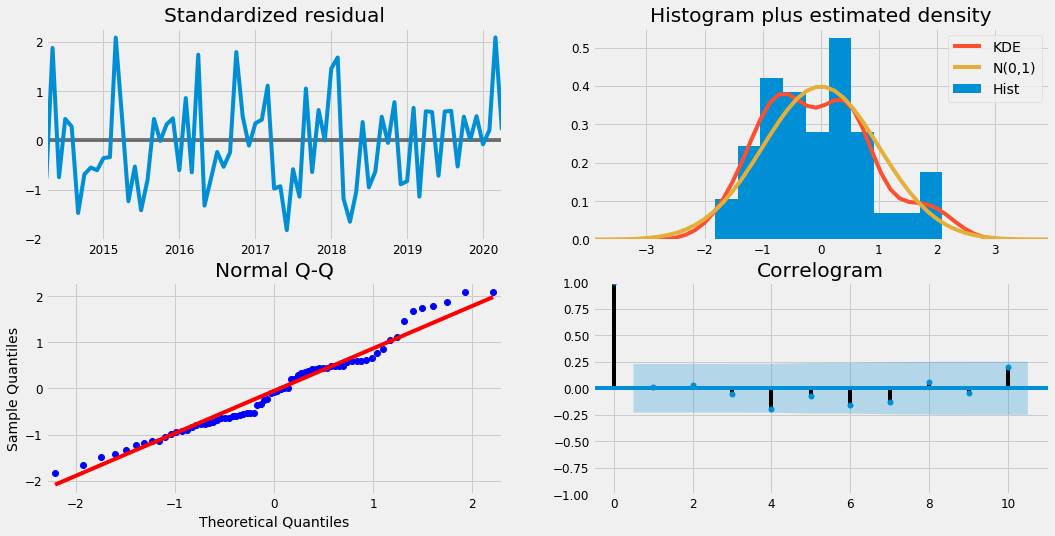

In [85]:
#plotting data using different methods to figure out trends, outliers, kernal density and residuals
results.plot_diagnostics(figsize=(16, 8))
plt.show()

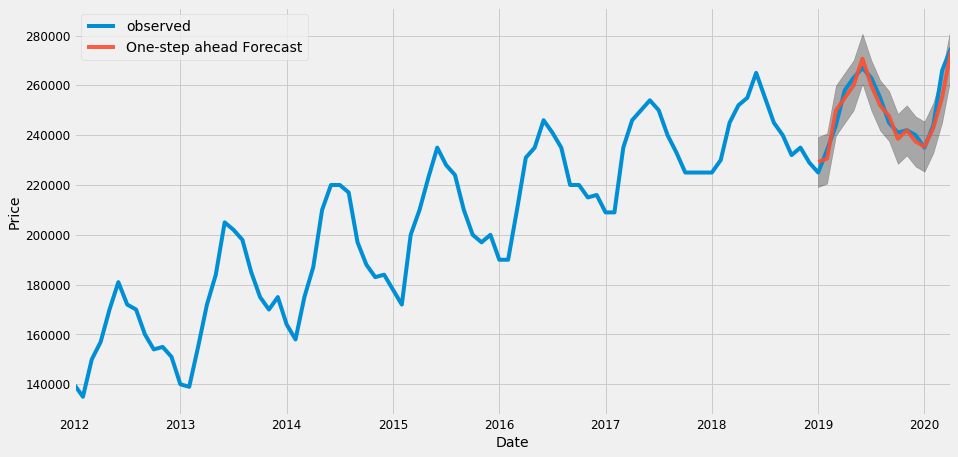

In [86]:
#Using our optimal AIC in a machine learning model to predict 2019-2020 housing prices to assess accuracy in the model
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()
#model is extreamly accurate 

In [87]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]

# Compute the mean square error to assess accuracy
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 15697870.56


In [88]:
#Another method to assess accuracy. on average the model is off by $3962 which is extreamly impressive
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3962.05


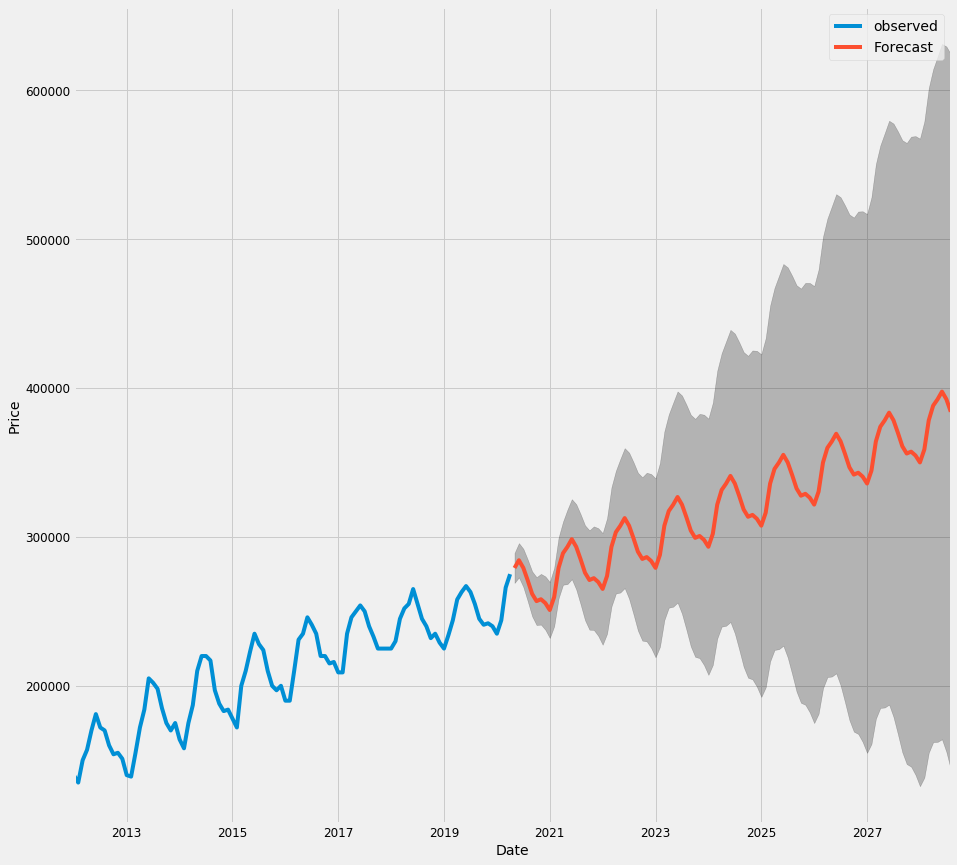

In [89]:
#predicting next 10 years with our above results
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 14))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [ ]:
#---------------------------------BOTY------------------------------
'''
The below code is making the same analysis on Back of the Yard (BOTY) neighborhood. Results are not as accurate. This is due
to BOTY having low seasonality and not many trends 


'''

In [90]:
#importing the data
dataBOTY = pd.read_excel (r'BOTY Housing Forecast.xlsx')

print (dataBOTY.dtypes)

Date     datetime64[ns]
Price             int64
dtype: object


In [91]:
dataBOTY = dataBOTY.sort_values('Date')

In [92]:
#Grouping
dataBOTY = dataBOTY.groupby('Date')['Price'].sum().reset_index()

In [93]:
#Indexing
dataBOTY = dataBOTY.set_index('Date')
dataBOTY.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [94]:
#Making sure everything is monthly
y = dataBOTY['Price'].resample('MS').mean()

In [95]:
#making sure it worked
y['2017':]

Date
2017-01-01     51000
2017-02-01     51000
2017-03-01     48000
2017-04-01     51000
2017-05-01     59000
2017-06-01     73000
2017-07-01     67000
2017-08-01     90000
2017-09-01     85000
2017-10-01     85000
2017-11-01     81000
2017-12-01     99000
2018-01-01    103000
2018-02-01    115000
2018-03-01    114000
2018-04-01    119000
2018-05-01    110000
2018-06-01     95000
2018-07-01    110000
2018-08-01    128000
2018-09-01    141000
2018-10-01    125000
2018-11-01    125000
2018-12-01    115000
2019-01-01    120000
2019-02-01     97000
2019-03-01    109000
2019-04-01    125000
2019-05-01    125000
2019-06-01    115000
2019-07-01    109000
2019-08-01    115000
2019-09-01    130000
2019-10-01    145000
2019-11-01    135000
2019-12-01    135000
2020-01-01    149000
2020-02-01    144000
2020-03-01    124000
2020-04-01    138000
Freq: MS, Name: Price, dtype: int64

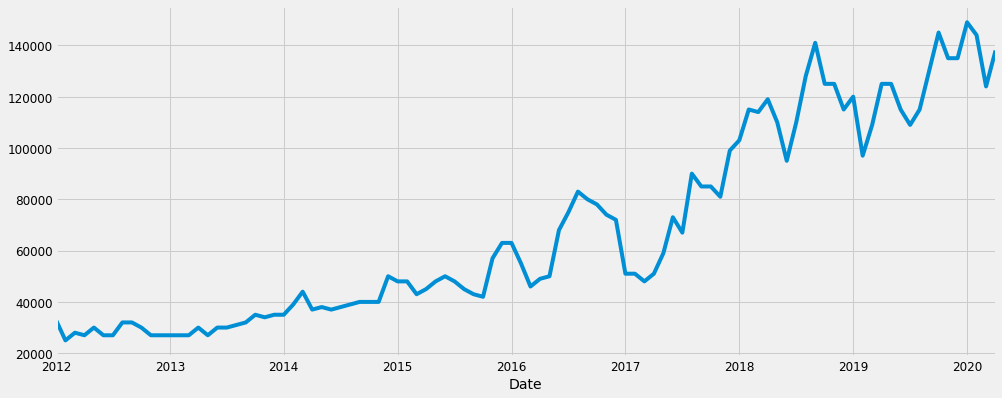

In [96]:
from fbprophet import Prophet
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
y.plot(figsize=(15, 6))
plt.show()

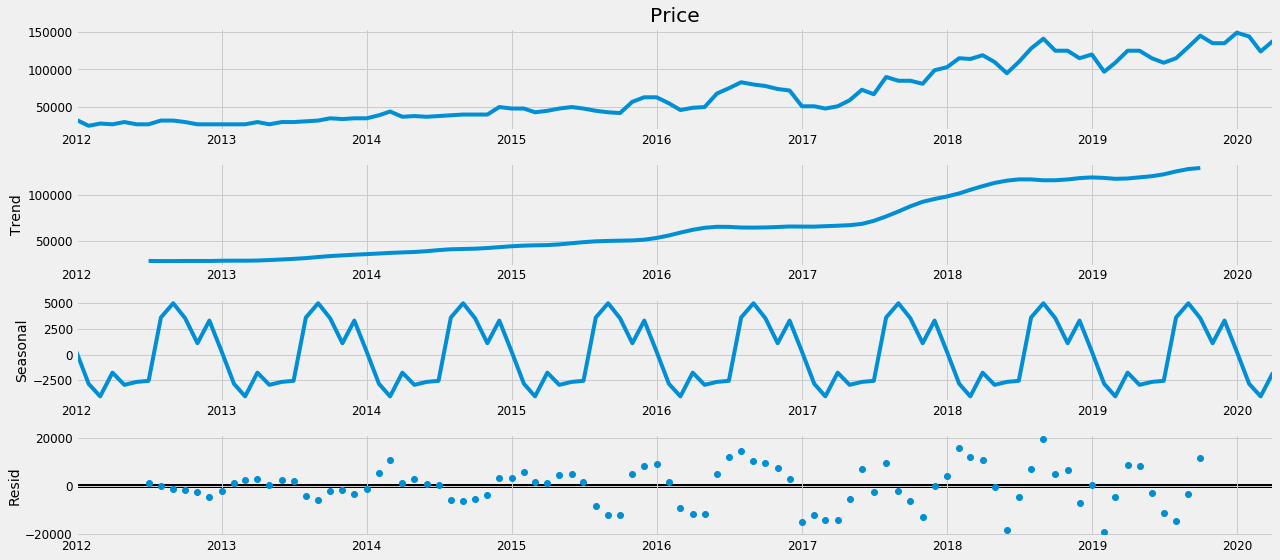

In [97]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [98]:
#building ARIMA model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [99]:
#finding optimization, looking for lowest AIC
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2513.9622702755105
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2183.8964729647796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1994.6770430415881
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1734.685250696522
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1984.1427259128272
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1941.1986684963213
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1752.4993724874446
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1718.6990449873329
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2423.8762459736404
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2117.4836591605103
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1926.3079630430914
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1666.5992255934293
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2155.7575610763547
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2108.0462013515657
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1710.2500396539047
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1659.1494679431325
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2051.7947015944846
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1813.0737707

In [100]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1564.0144763528747
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9532      0.045    -20.990      0.000      -1.042      -0.864
ma.L1          0.9601      0.046     20.848      0.000       0.870       1.050
ma.S.L12      -0.8013      0.093     -8.604      0.000      -0.984      -0.619
sigma2      1.219e+08   5.64e-11   2.16e+18      0.000    1.22e+08    1.22e+08


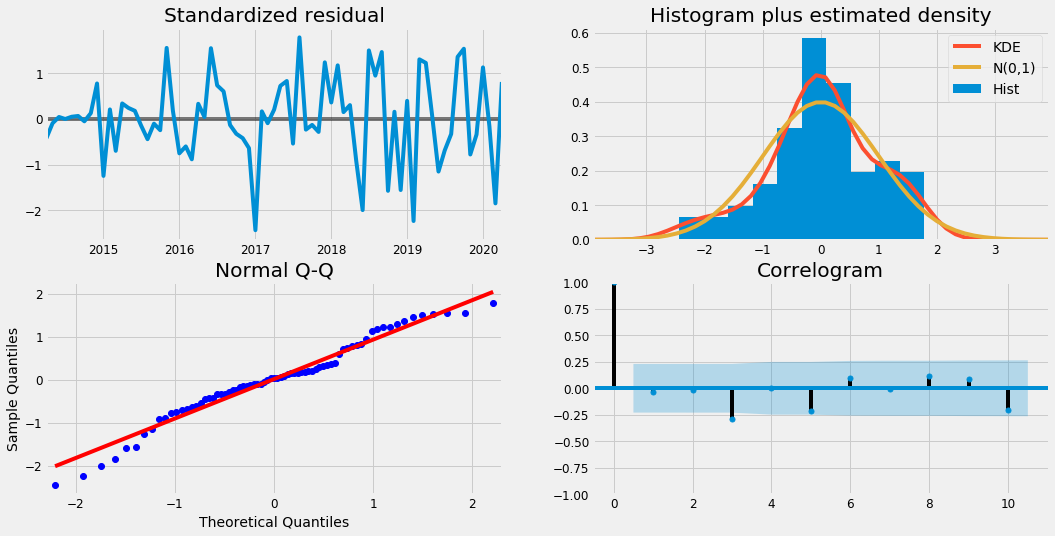

In [101]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

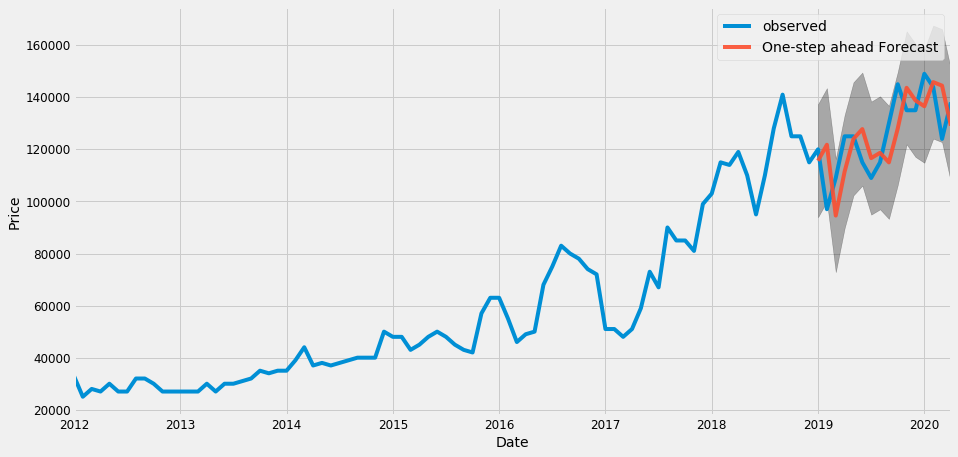

In [102]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [103]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 157394670.72


In [104]:
#
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 12545.7


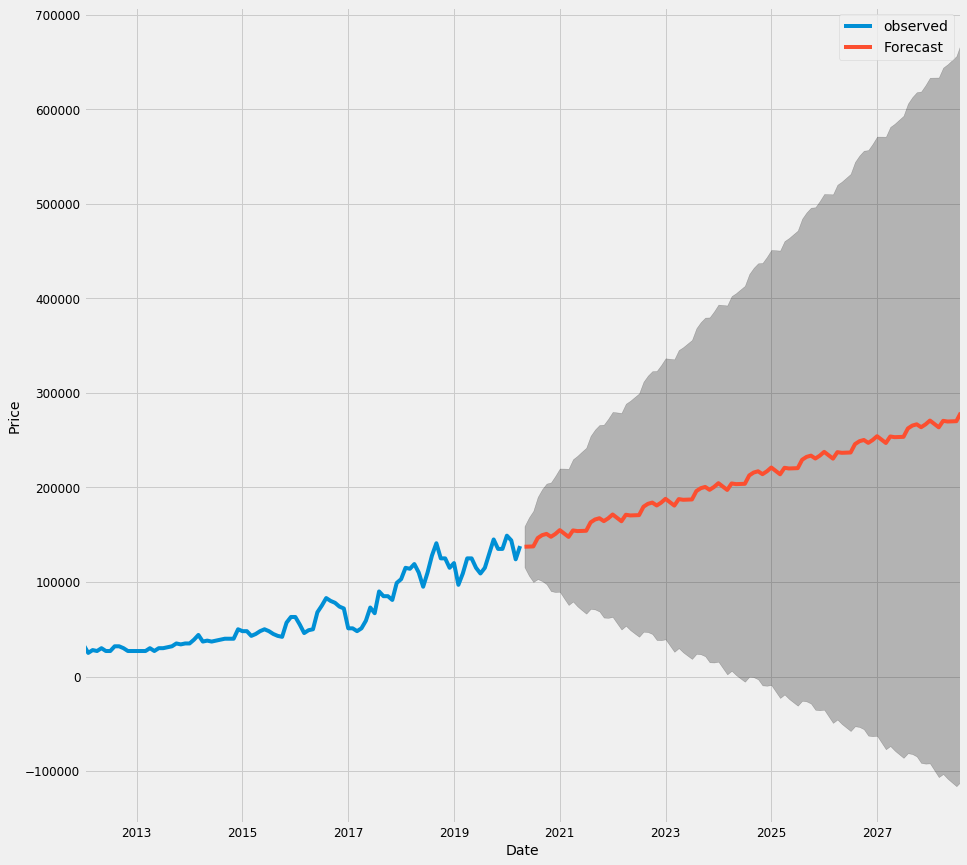

In [105]:
#predicting next 10 years
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 14))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()